# `ipyparallel` magics

In [1]:
import ipyparallel as ipp


rc = ipp.Client()

In [2]:
with rc[:].sync_imports():
    from matplotlib.pyplot import plot
    from numpy.linalg import eigvals
    from numpy.random import rand
    from numpy.random import random

importing plot from matplotlib.pyplot on engine(s)
importing eigvals from numpy.linalg on engine(s)
importing rand from numpy.random on engine(s)
importing random from numpy.random on engine(s)


In [3]:
%px a = rand(2,2)

In [4]:
%px eigvals(a)

Out[0:2]: array([0.92645255, 0.48484728])

Out[3:2]: array([0.23462225, 0.7614717 ])

Out[1:2]: array([1.36472418, 0.17225772])

Out[2:2]: array([0.88215574, 0.01329861])

In [5]:
%px print("hi")

[stdout:0] hi


[stdout:1] hi


[stdout:2] hi


[stdout:3] hi


In [6]:
%px %matplotlib inline

Out[3:5]: [<matplotlib.lines.Line2D at 0x12c926f50>]

Out[2:5]: [<matplotlib.lines.Line2D at 0x1180bc3d0>]

Out[1:5]: [<matplotlib.lines.Line2D at 0x116a39b10>]

Out[0:5]: [<matplotlib.lines.Line2D at 0x1164c5e50>]

[output:1]

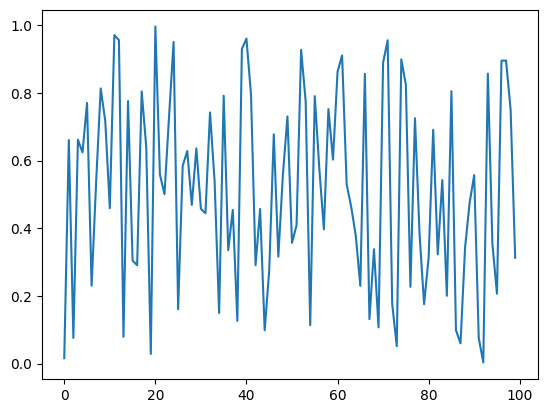

[output:2]

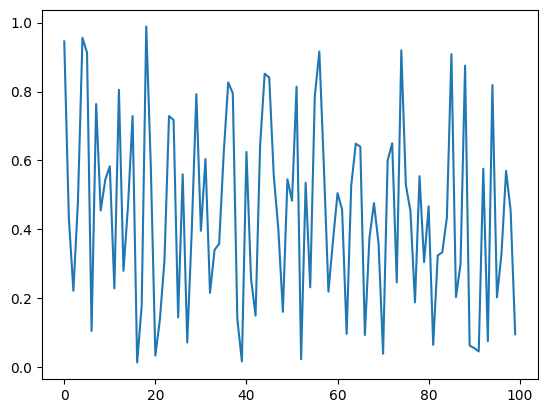

[output:0]

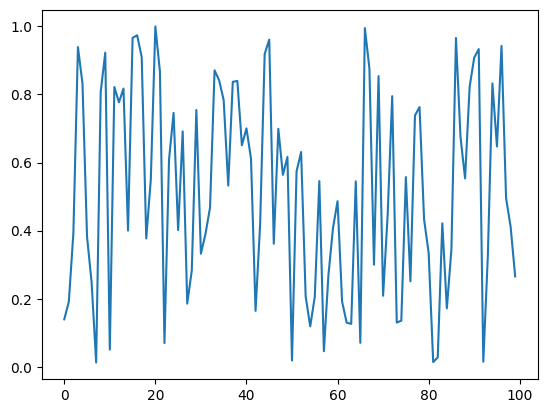

[output:3]

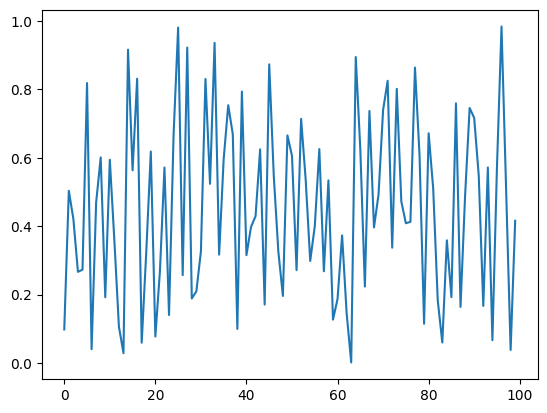

In [7]:
%px plot(rand(100))

## `%%px` cell magic 

`--targets`, `--block` and `--noblock`

In [8]:
%%px --targets ::2
print("I am even")

[stdout:0] I am even


[stdout:2] I am even


In [9]:
%%px --targets 1
print("I am number 1")

[stdout:1] I am number 1


In [10]:
%%px
print("still all by default")

[stdout:0] still all by default


[stdout:1] still all by default


[stdout:2] still all by default


[stdout:3] still all by default


In [11]:
%%px --noblock
import time
time.sleep(1)
time.time()

<AsyncResult(%px): pending>

In [12]:
%pxresult

Out[0:8]: 1687880859.822293

Out[1:8]: 1687880859.82328

Out[2:8]: 1687880859.825772

Out[3:7]: 1687880859.823294

In [13]:
%%px --block --group-outputs=engine
a = random((2,2))
ev = eigvals(a)
print(ev)
ev.max()

[stdout:0] [-0.28021424  0.98267777]


Out[0:9]: 0.9826777676672127

[stdout:1] [-0.21385117  0.65604043]


[stdout:3] [-0.01307275  1.11437227]


Out[1:9]: 0.6560404264968436

[stdout:2] [ 1.0290232  -0.55640908]


Out[3:8]: 1.1143722684611335

Out[2:9]: 1.0290231951538584

## `%pxresult`

In [14]:
dview = rc[:]

In [15]:
dview.block = False
%px print("hi")
%pxresult

[stdout:0] hi


[stdout:1] hi


[stdout:2] hi


[stdout:3] hi


[stdout:0] 
hi
[stdout:1] 
hi
[stdout:2] 
hi
[stdout:3] 
hi


## `%pxconfig`

In [16]:
%pxconfig --block
%px print("hi")

[stdout:0] hi


[stdout:1] hi


[stdout:2] hi


[stdout:3] hi


In [17]:
%pxconfig --targets ::2
%px print("hi")

[stdout:0] hi


[stdout:2] hi


In [18]:
%pxconfig --noblock
%px print("hi")

<AsyncResult(%px): pending>

In [19]:
%pxresult

[stdout:0] 
hi
[stdout:2] 
hi


## `%autopx`

In [20]:
dview = rc[:]

In [21]:
dview.block=True

In [22]:
%autopx

%autopx enabled


In [23]:
max_evals = []
for i in range(100):
    a = rand(10, 10)
    a = a + a.transpose()
    evals = eigvals(a)
    max_evals.append(evals[0].real)

In [7]:
print(f"Average max eigenvalue is: {sum(max_evals)/len(max_evals)}")

[stdout:0] Average max eigenvalue is: 10.16283266814223


[stdout:1] Average max eigenvalue is: 10.107913323305741


[stdout:2] Average max eigenvalue is: 10.107616513254618


[stdout:3] Average max eigenvalue is: 10.040409820953181


## Multiple active views

Magics of `ipyparallel` are assigned to certain `DirectView` objects. However, the active view can be changed by calling the `activate()` method on a view.

In [25]:
even = rc[::2]
even.activate()
%px print("hi")

<AsyncResult(%px): pending>

In [26]:
even.block = True
%px print("hi")

[stdout:0] hi


[stdout:2] hi


If you activate the view, you can also specify a suffix so that it can be assigned to a whole range of magics without replacing the existing ones.

In [27]:
rc.activate()

<DirectView all>

In [28]:
even.activate("_even")
%px print("hi")

[stdout:0] hi


[stdout:1] hi


[stdout:2] hi


[stdout:3] hi


In [29]:
%px_even print("We aren’t odd!")

[stdout:0] We aren’t odd!


[stdout:2] We aren’t odd!


This suffix is used at the end of all magics, e.g.`%autopx_even`, `%pxresult_even` etc.

For the sake of simplicity, also `Client`  has an `activate()` method that creates a `DirectView` with `block = True`, activates it, and returns the new view.

The initial magics that are registered when a client is created are the result of the call `rc.activate()` with standard arguments.

## Engines as kernel

Engines are actually the same object as IPython kernels, with the only exception that engines connect to a controller, while regular kernels bind their sockets directly to connections to their front end.

Sometimes you will connect your front end directly to an engine for debugging or analysing the interaction more directly. You can also do this by instructing the engine to bind its kernel to your frontend as well:

In [30]:
%px import ipyparallel as ipp; ipp.bind_kernel()
%px %qtconsole

<div class="alert alert-block alert-info">

**Note:**

Be careful with this statement, as it starts as many QtConsoles as there are engines available.
</div>


Alternatively, you can also display the connection information and determine how you can establish a connection to the engines, depending on where they live and where you are:

In [31]:
%px %connect_info

[stdout:0] {
  "shell_port": 63143,
  "iopub_port": 63148,
  "stdin_port": 63154,
  "control_port": 63167,
  "hb_port": 63156,
  "ip": "127.0.0.1",
  "key": "defc3484-e06d43284f54a3939ad7eec2",
  "transport": "tcp",
  "signature_scheme": "hmac-sha256",
  "kernel_name": ""
}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing /srv/jupyter/.ipython/profile_default/security/kernel-11237.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.


[stdout:1] {
  "shell_port": 63145,
  "iopub_port": 63149,
  "stdin_port": 63153,
  "control_port": 63165,
  "hb_port": 63155,
  "ip": "127.0.0.1",
  "key": "defc3484-e06d43284f54a3939ad7eec2",
  "transport": "tcp",
  "signature_scheme": "hmac-sha256",
  "kernel_name": ""
}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing /srv/jupyter/.ipython/profile_default/security/kernel-11238.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.


[stdout:2] {
  "shell_port": 63147,
  "iopub_port": 63152,
  "stdin_port": 63160,
  "control_port": 63166,
  "hb_port": 63161,
  "ip": "127.0.0.1",
  "key": "defc3484-e06d43284f54a3939ad7eec2",
  "transport": "tcp",
  "signature_scheme": "hmac-sha256",
  "kernel_name": ""
}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing /srv/jupyter/.ipython/profile_default/security/kernel-11239.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.


[stdout:3] {
  "shell_port": 63150,
  "iopub_port": 63159,
  "stdin_port": 63162,
  "control_port": 63169,
  "hb_port": 63163,
  "ip": "127.0.0.1",
  "key": "defc3484-e06d43284f54a3939ad7eec2",
  "transport": "tcp",
  "signature_scheme": "hmac-sha256",
  "kernel_name": ""
}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing /srv/jupyter/.ipython/profile_default/security/kernel-11240.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.
